# ___One-Class SVM___

## ___SVM___
_Support vector machines (SVMs) are a type of learning model used for classification and regression analysis.
In an SVM data points are represented as points in space in such a way that points from different categories are separated by a plane. You can think of this like a line through data points that separates data of different classes._

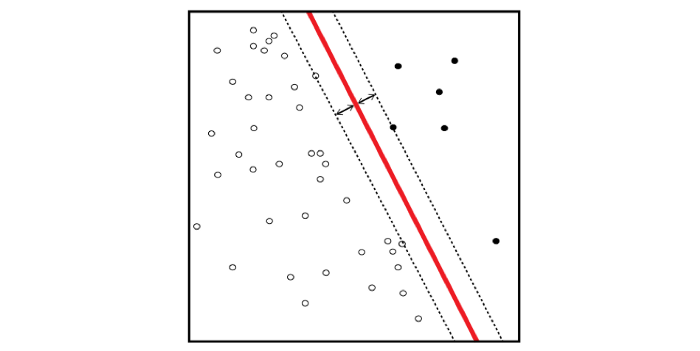

_New data are mapped into the same space and their location relative to the plane is used to predict which categories each point belongs, with the plane being referred to as the decision boundary (i.e. determining to which class the data belongs). In the case where the decision boundary needs to be non-linear (i.e. where classes cannot be separated by a straight line), SVMs also have the ability to project space through a non-linear function, lifting the data to a space with a higher dimension where a linear decision boundary does separate classes._

## ___One-Class SVM___
___One-class SVMs___ _are a special case of support vector machine. First, data is modelled and the algorithm is trained. Then when new data are encountered their position relative to the “normal” data (or inliers) from training can be used to determine whether it is “out of class” or not — in other words, whether it is unusual or not. Because they can be trained with unlabelled data they are an example of unsupervised machine learning._

_One-Class SVM is similar, but instead of using a hyperplane to separate two classes of instances, it uses a hypersphere to encompass all of the instances. Now think of the "margin" as referring to the outside of the hypersphere -- so by "the largest possible margin", we mean "the smallest possible hypersphere"._

_Note the following facts, true of SVM, still apply to One-Class SVM:_

* _If we insist that there are no margin violations, by seeking the smallest hypersphere, the margin will end up touching a small number of instances. These are the "support vectors", and they fully determine the model. As long as they are within the hypersphere, all of the other instances can be changed without affecting the model._

* _We can allow for some margin violations if we don't want the model to be too sensitive to noise._

* _We can do this in the original space, or in an enlarged feature space (implicitly, using the kernel trick), which can result in a boundary with a complex shape in the original space._

### ___Parameters___
_It accepts a few parameters but the most important are nu, kernel, and for the RBF kernel we'll be using, gamma._

* ___nu___ _is "An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors" and must be between 0 and 1. Basically this means the proportion of outliers we expect in our data. This is an important factor to consider when assessing algorithms. Many unsupervised ML algorithms require you to know (or hint at) the number of outliers or class members you expect._


* ___kernel___ _is the kernel type to be used. Earlier we discussed SVM's ability to use a non-linear function to project the hyperspace to higher dimension. Setting kernel to something other than linear here will achieve that. The default is rbf (RBF - radial basis function)._


* ___gamma___ _is a parameter of the RBF kernel type and controls the influence of individual training samples - this effects the "smoothness" of the model. A low value improves the smoothness and "generalizability" of the model, while a high value reduces it but makes the model "tighter-fitted" to the training data. Some experimentation is often required to find the best value._

___We now have two ways to make use of the trained model:___

* _Find the distance from the hyperplane of some samples using __decision_function__. The distance is on an arbitrary scale so to make use of it we need to either define a threshold to use or scale it to something useful_


* _Perform a regression on some samples using __predict__. This will return values +1 or -1 indicating whether or not the sample(s) are "in class" or "out of class" (are normal or abnormal relative to the trained model)_

## ___Mall Customer Anomaly Detection___

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn-pastel')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv(r'C:\Users\PiyushSin\Desktop\datasets\Mall_Customers.csv')
data.head()

data.columns

data=data.drop('CustomerID',axis=1)
data=data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Spend_Score'})

df=pd.get_dummies(data)
df

,Age,Income,Spend_Score,Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [4]:
from sklearn import svm

clf=svm.OneClassSVM(nu=.2,kernel='rbf',gamma=.001)
clf.fit(df)

OneClassSVM(gamma=0.001, nu=0.2)

In [14]:
clf.decision_function(df)

array([-7.49652617e-01, -7.92264499e-03, -1.45794587e+00,  7.33907844e-02,
       -2.66080095e-01,  9.57077243e-02, -4.59773425e-01, -1.58833453e-04,
       -5.92960450e-01,  1.23187616e-01, -5.36589210e-01, -4.05636134e-01,
        3.43367567e-02,  3.33854537e-01,  7.91682961e-05,  3.16156440e-01,
       -3.25303755e-04,  9.98454509e-05,  9.33770958e-03, -2.00205227e-01,
        1.13999675e-01,  4.19659596e-01,  3.70271489e-02,  3.81912266e-01,
        4.03286029e-01,  6.01360003e-01,  2.44244237e-01,  1.47357347e-01,
        2.96620824e-01,  4.90761147e-01, -1.15119412e-01,  3.86336812e-01,
        1.74554743e-04, -4.69898534e-02,  4.18517136e-01,  4.14531433e-01,
        3.41841295e-01,  5.05853228e-01,  2.60340708e-01,  2.67788582e-01,
        1.16229695e-04,  1.19709532e-01,  4.09716914e-01,  4.16707747e-01,
        4.42610413e-01,  3.49398073e-01,  2.02466103e-01,  3.00664606e-01,
        2.89469443e-01,  3.28528641e-01,  3.48325616e-01,  4.32563915e-01,
        4.33434054e-01,  

In [6]:
y_pred=clf.predict(df)
y_pred

array([-1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,
       -1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1], dtype=int64)

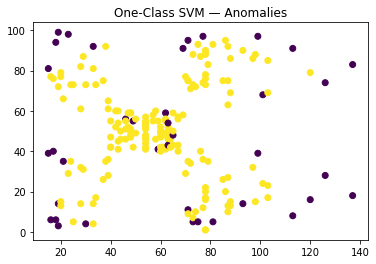

In [13]:
plt.scatter(df.iloc[:,1],df.iloc[:,2],c=y_pred)
plt.title('One-Class SVM — Anomalies');